In [1]:
import pandas as pd
import seaborn as sns
import glob
import os
import numpy as np

In [2]:
example = "example1"

assembly_files = glob.glob(os.path.expanduser('~/OneDrive - The University of Melbourne/Documents/MDAP/Verbruggen/'+example+'/assembly/') + "*.txt")

In [3]:
assembly_stats = pd.DataFrame()
for file in assembly_files:
    parts = file.split("\\")[-1].split(".txt")[0].split("_")
    assembler = parts[0]
    filename = parts[1]
    
    with open(file, 'rt') as fd:
        next(fd)
        lines = [line.strip().split(': ') for line in fd]

        temp = pd.DataFrame({line[0]: line[1] for line in lines}, index=[0])
        temp.insert(0, 'assembler', assembler)
        temp.insert(1, 'filename', filename)

        assembly_stats = pd.concat([assembly_stats, temp], ignore_index=True)


assembly_stats.drop(['Average shared text size (kbytes)','Swaps','Socket messages sent','File system inputs','Socket messages received','Average resident set size (kbytes)','Major (requiring I/O) page faults','Signals delivered','Page size (bytes)','Average unshared data size (kbytes)','Average stack size (kbytes)','Average total size (kbytes)','Exit status'], axis=1, inplace=True)

In [5]:
assembly_stats

,assembler,filename,total_length_bp,total_sequences,N25_count,N25,N50_count,N50,N75_count,N75,...,Command being timed,User time (seconds),System time (seconds),Percent of CPU this job got,Elapsed (wall clock) time (h:mm:ss or m:ss),Maximum resident set size (kbytes),Minor (reclaiming a frame) page faults,Voluntary context switches,Involuntary context switches,File system outputs
0,megahit,final.contigs,1183990543,1309905,29213,5331,141555,1462,514340,530,...,"""megahit -1 data/TTB000062_full1.fastq -2 data...",338331.25,361.89,2074%,4:32:08,20931144,45445773,24827696,198615,0
1,spades1,reduced.scaffolds,1421742689,2029982,61433,2951,304129,866,937159,412,...,"""metaspades.py -1 data/TTB000062_full1.fastq -...",706662.46,17276.54,1318%,15:15:18,225000752,2044070202,908981995,735681,44056504
2,spades1,scaffolds,1430160594,2083432,62149,2929,309021,855,952550,408,...,"""metaspades.py -1 data/TTB000062_full1.fastq -...",706662.46,17276.54,1318%,15:15:18,225000752,2044070202,908981995,735681,44056504
3,spades2,reduced.scaffolds,1644957669,3470503,79421,2238,545873,502,1706244,275,...,"""metaspades.py -1 data/TTB000062_full1.fastq -...",825762.67,14607.71,1229%,18:58:47,224941104,2368596899,536499143,988053,44056512
4,spades2,scaffolds,1693820376,3930552,85034,2117,595834,477,1842310,264,...,"""metaspades.py -1 data/TTB000062_full1.fastq -...",825762.67,14607.71,1229%,18:58:47,224941104,2368596899,536499143,988053,44056512
5,spades3,reduced.scaffolds,1089550268,1496207,43386,3429,192400,1070,646554,408,...,"""metaspades.py -1 data//TTB000062_full1.fastq ...",552376.08,14772.85,1346%,11:42:00,224984972,1401165503,582667806,437622,44056512
6,spades3,scaffolds,1097969428,1549654,44003,3400,196371,1051,662121,403,...,"""metaspades.py -1 data//TTB000062_full1.fastq ...",552376.08,14772.85,1346%,11:42:00,224984972,1401165503,582667806,437622,44056512
7,vm,megahit,679751386,214847,11007,9360,38259,4427,94608,2123,...,"""../MEGAHIT-1.2.9-Linux-x86_64-static/bin/mega...",449942.98,828.64,1062%,11:47:02,20757720,74224106,6142754,403338,197232792
8,vm,megahit,1183995364,1309921,29214,5331,141556,1462,514348,530,...,"""../MEGAHIT-1.2.9-Linux-x86_64-static/bin/mega...",449942.98,828.64,1062%,11:47:02,20757720,74224106,6142754,403338,197232792
9,vm,metaspades,1688614826,3626092,87016,2072,585722,494,1794103,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def get_mins(time_str):
    if time_str:
        if time_str.count(":")==2:
            """Get minutes from time."""
            h, m, s = time_str.split(':')
            total_time = (int(h) * 3600 + int(m) * 60 + float(s))/60
        elif time_str.count(":")==1:
            """Get minutes from time."""
            m, s = time_str.split(':')
            total_time = (int(m) * 60 + float(s))/60
        
    return total_time

assembly_stats['time (minutes)'] = assembly_stats['Elapsed (wall clock) time (h:mm:ss or m:ss)'].apply(get_mins)

assembly_stats['Percent of CPU this job got'] = assembly_stats['Percent of CPU this job got'].str.replace('%','')

numeric_cols = ['threads', 'Percent of CPU this job got','Maximum resident set size (kbytes)']
assembly_stats[numeric_cols] = assembly_stats[numeric_cols].apply(pd.to_numeric, errors='coerce', axis=1)

assembly_stats['kmers'] = np.select([assembly_stats.assembler == 'megahit',assembly_stats.assembler == 'spades1',assembly_stats.assembler.str.contains('spades2'),assembly_stats.assembler == 'spades3'], 
                        ['21,29,39,59,79,99,119,141', '21,29,39,59,79,119', '29,39,59', '59,79,119'], 
                        default='unknown')

assembly_stats['threads'] = np.select([assembly_stats.assembler.str.contains('spades2')],[24],default=12)

assembly_stats['assembler'] = np.select([assembly_stats.assembler.str.contains('megahit'),assembly_stats.assembler.str.contains('spades')],['megahit','metaspades'],default='unknown')

assembly_stats['max_memory_gb'] = np.ceil(assembly_stats['Maximum resident set size (kbytes)'].divide(1048576))

assembly_stats

SyntaxError: invalid syntax (<ipython-input-6-b8cfd95c23c2>, line 2)

In [5]:
assembly_stats.to_csv('~/Desktop/'+example+'/assembly/'+example+'_stats.csv', index=False)

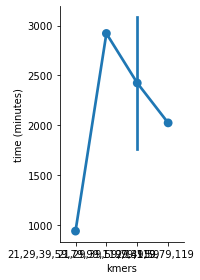

In [6]:
sns.catplot(x="kmers", y="time (minutes)", data=assembly_stats, kind="point", dodge=True, height=4, aspect=.7, margin_titles=True)